In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

jabinyanah tn
la ronge ca
ushuaia ar
poya nc
burns lake ca
jamestown sh
irece br
poum nc
aripuana br
hilo us
viedma ar
bambous virieux mu
ushuaia ar
new norfolk au
saint-philippe re
vaitupu wf
haines junction ca
harrisburg us
puerto ayora ec
chokurdakh ru
longyearbyen sj
garm tj
ulaangom mn
ahipara nz
rikitea pf
andijon uz
arraial do cabo br
ushuaia ar
hilo us
dingle ie
vaini to
cape town za
ngukurr au
jamestown sh
barentsburg sj
weligama lk
rikitea pf
kapaa us
bethel us
alyangula au
tuatapere nz
egvekinot ru
bikin ru
hobart au
noumea nc
cape town za
hobart au
hilo us
verkhnevilyuysk ru
nanortalik gl
vestmanna fo
yar-sale ru
ushuaia ar
ponta do sol cv
ribeira grande pt
marzuq ly
sola vu
anadyr ru
satitoa ws
livno ba
huescar es
punta arenas cl
busselton au
kenora ca
hermanus za
tuktoyaktuk ca
kapaa us
ushuaia ar
georgetown sh
san patricio mx
belushya guba ru
mogadishu so
kayes ml
kodiak us
chuy uy
illoqqortoormiut gl
provideniya ru
nizhneyansk ru
grand river south east mu
rikitea pf
niz

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [15]:
#Import our dependencies and initialize counters and an empty list that will hold the weather data.
#Loop through the cities list.
#Group the cities in sets of 50 to log the process as we find the weather data for each city.
#Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#Build the city_url or endpoint for each city.
#Log the URL and the record and set numbers.
#Make an API request for each city.
#Parse the JSON weather data for the following:
#City, country, and date
#Latitude and longitude
#Maximum temperature
#Humidity
#Cloudiness
#Wind speed
#Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [16]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0c9ce23aa34c6c0d9a6303e8f21a3dee


In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

poc
Processing Record 34 of Set 16 | victoria
Processing Record 35 of Set 16 | kavaratti
Processing Record 36 of Set 16 | taoudenni
Processing Record 37 of Set 16 | college
Processing Record 38 of Set 16 | bantry
Processing Record 39 of Set 16 | waingapu
Processing Record 40 of Set 16 | hithadhoo
Processing Record 41 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 42 of Set 16 | snyder
Processing Record 43 of Set 16 | vanimo
Processing Record 44 of Set 16 | talnakh
Processing Record 45 of Set 16 | pisco
Processing Record 46 of Set 16 | fairbanks
Processing Record 47 of Set 16 | margate
Processing Record 48 of Set 16 | nhulunbuy
Processing Record 49 of Set 16 | saint george
Processing Record 50 of Set 16 | ilulissat
Processing Record 1 of Set 17 | sungaipenuh
Processing Record 2 of Set 17 | lebu
Processing Record 3 of Set 17 | torbay
Processing Record 4 of Set 17 | makaryev
Processing Record 5 of Set 17 | florencia
Processing Record 6 of Set 17 | necochea
Processing R

In [26]:
len(city_data)

562

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jabinyanah,35.0350,10.9081,71.40,85,2,11.74,TN,2021-05-22 21:08:35
1,La Ronge,55.1001,-105.2842,50.02,37,8,6.31,CA,2021-05-22 21:13:37
2,Ushuaia,-54.8000,-68.3000,37.06,100,75,0.00,AR,2021-05-22 21:05:01
3,Poya,-21.3500,165.1500,69.53,76,38,4.54,NC,2021-05-22 21:08:36
4,Burns Lake,54.2331,-125.7533,65.88,40,25,8.84,CA,2021-05-22 21:13:37
5,Jamestown,42.0970,-79.2353,79.09,71,75,3.00,US,2021-05-22 21:05:32
6,Irece,-11.3042,-41.8558,80.69,37,71,12.03,BR,2021-05-22 21:08:36
7,Poum,-20.2333,164.0167,73.08,72,46,16.33,NC,2021-05-22 21:08:37
8,Aripuana,-9.1667,-60.6333,83.64,71,100,0.07,BR,2021-05-22 21:07:23
9,Hilo,19.7297,-155.0900,78.53,75,90,0.00,US,2021-05-22 21:08:37


In [31]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]


In [36]:
city_data_df = city_data_df[new_column_order]

In [37]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jabinyanah,TN,2021-05-22 21:08:35,35.0350,10.9081,71.40,85,2,11.74
1,La Ronge,CA,2021-05-22 21:13:37,55.1001,-105.2842,50.02,37,8,6.31
2,Ushuaia,AR,2021-05-22 21:05:01,-54.8000,-68.3000,37.06,100,75,0.00
3,Poya,NC,2021-05-22 21:08:36,-21.3500,165.1500,69.53,76,38,4.54
4,Burns Lake,CA,2021-05-22 21:13:37,54.2331,-125.7533,65.88,40,25,8.84
...,...,...,...,...,...,...,...,...,...
557,Iquique,CL,2021-05-22 21:08:47,-20.2208,-70.1431,62.64,75,95,3.91
558,Mokobeng,BW,2021-05-22 21:11:11,-22.9965,27.6678,63.79,59,53,12.10
559,Zyryanka,RU,2021-05-22 21:11:11,65.7500,150.8500,47.10,51,82,8.84
560,Lorengau,PG,2021-05-22 21:11:12,-2.0226,147.2712,81.28,81,88,6.02


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [40]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1621721320.2671766

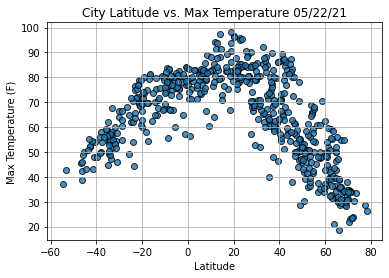

In [41]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

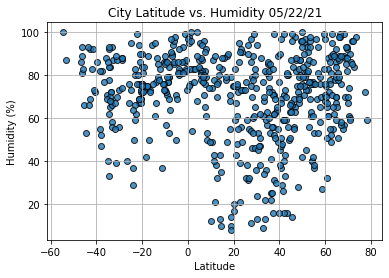

In [42]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

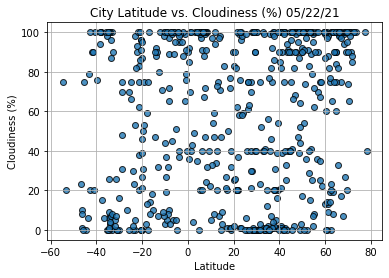

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

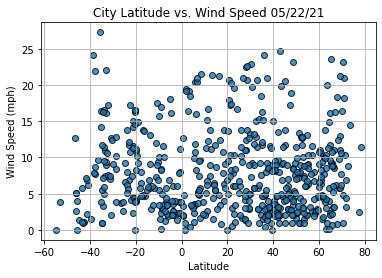

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()